In [96]:
import pandas as pd
import numpy as np


df = pd.read_csv("data/train_lenta.csv")
df.shape

(714510, 195)

## EDA

In [97]:
df.head()

,age,cheque_count_12m_g20,cheque_count_12m_g21,cheque_count_12m_g25,cheque_count_12m_g32,cheque_count_12m_g33,cheque_count_12m_g38,cheque_count_12m_g39,cheque_count_12m_g41,cheque_count_12m_g42,...,sale_sum_6m_g26,sale_sum_6m_g32,sale_sum_6m_g33,sale_sum_6m_g44,sale_sum_6m_g54,stdev_days_between_visits_15d,stdev_discount_depth_15d,stdev_discount_depth_1m,target,treatment
0,81.0,9.0,14.0,12.0,7.0,19.0,8.0,4.0,18.0,9.0,...,0.00,314.91,1045.57,134.36,0.00,0.0,0.0,0.0000,0,1
1,56.0,17.0,13.0,24.0,14.0,3.0,2.0,2.0,13.0,13.0,...,582.83,3489.72,119.52,1031.92,218.12,0.0,NaN,0.1608,0,0
2,63.0,0.0,0.0,0.0,0.0,9.0,2.0,8.0,0.0,2.0,...,93.67,0.00,424.98,0.00,0.00,0.0,0.0,0.0000,0,1
3,56.0,0.0,1.0,0.0,0.0,2.0,0.0,1.0,4.0,1.0,...,34.89,0.00,109.90,81.99,77.38,0.0,0.0,0.0000,0,0
4,47.0,0.0,1.0,0.0,0.0,1.0,0.0,4.0,2.0,0.0,...,0.00,0.00,209.14,241.50,89.99,0.0,0.0,0.0000,0,1


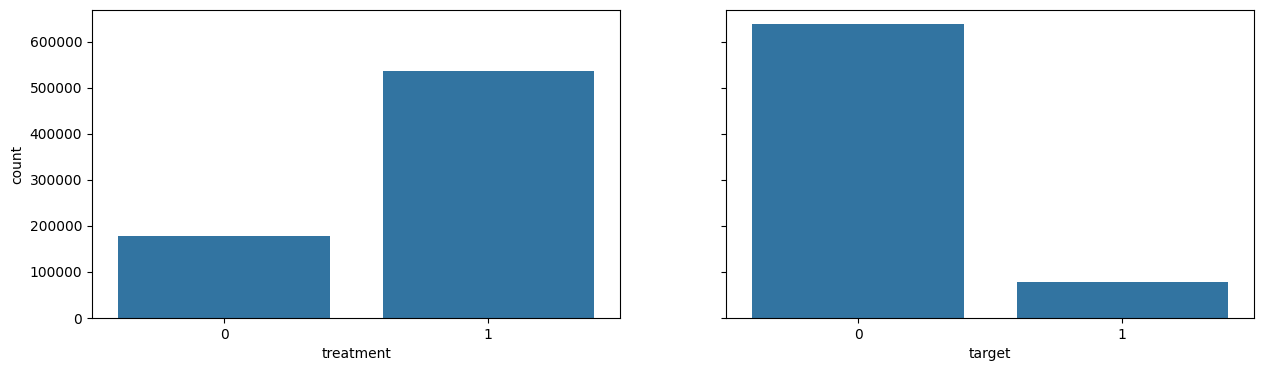

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1,2, sharey=True, figsize=(15,4))

treatment = df["treatment"]
target = df["target"]

sns.countplot(x=treatment, ax=ax[0])
sns.countplot(x=target, ax=ax[1])
plt.show()

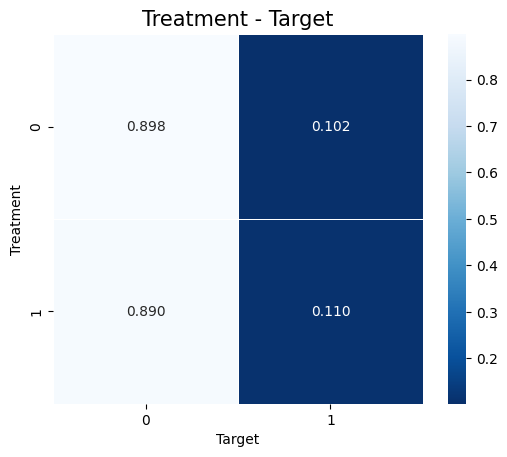

In [99]:
def crosstab_plot(treatment, target):
    ct = pd.crosstab(treatment, target, normalize='index')

    sns.heatmap(ct, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
    plt.ylabel('Treatment')
    plt.xlabel('Target')
    plt.title("Treatment - Target", size = 15)

crosstab_plot(df.treatment, df.target)

### NANs

In [100]:
missing_cols_df = pd.DataFrame({"Total" : df.isna().sum().sort_values(ascending = False),
                                "Percentage" : round(df.isna().sum().sort_values(ascending = False) / len(df), 3)})

missing_cols_df.head()

,Total,Percentage
k_var_sku_price_15d_g49,515749,0.722
k_var_disc_share_15d_g49,515643,0.722
k_var_count_per_cheque_15d_g34,486931,0.681
k_var_sku_price_15d_g34,486931,0.681
k_var_disc_share_15d_g34,486846,0.681


In [101]:
missing_cols_df[missing_cols_df['Percentage'] > 0.1]['Percentage'].count()

114

Let's drop all features that have more than 10% missing values (for now)

In [102]:
cols_to_drop = missing_cols_df[missing_cols_df['Percentage'] > 0.1].index
df.drop(cols_to_drop, axis=1, inplace=True)
df.head()

,age,cheque_count_12m_g20,cheque_count_12m_g21,cheque_count_12m_g25,cheque_count_12m_g32,cheque_count_12m_g33,cheque_count_12m_g38,cheque_count_12m_g39,cheque_count_12m_g41,cheque_count_12m_g42,...,sale_sum_12m_g54,sale_sum_6m_g24,sale_sum_6m_g25,sale_sum_6m_g26,sale_sum_6m_g32,sale_sum_6m_g33,sale_sum_6m_g44,sale_sum_6m_g54,target,treatment
0,81.0,9.0,14.0,12.0,7.0,19.0,8.0,4.0,18.0,9.0,...,2108.73,553.71,138.07,0.00,314.91,1045.57,134.36,0.00,0,1
1,56.0,17.0,13.0,24.0,14.0,3.0,2.0,2.0,13.0,13.0,...,302.08,2370.95,1023.70,582.83,3489.72,119.52,1031.92,218.12,0,0
2,63.0,0.0,0.0,0.0,0.0,9.0,2.0,8.0,0.0,2.0,...,0.00,119.99,0.00,93.67,0.00,424.98,0.00,0.00,0,1
3,56.0,0.0,1.0,0.0,0.0,2.0,0.0,1.0,4.0,1.0,...,228.53,286.90,0.00,34.89,0.00,109.90,81.99,77.38,0,0
4,47.0,0.0,1.0,0.0,0.0,1.0,0.0,4.0,2.0,0.0,...,242.86,268.35,0.00,0.00,0.00,209.14,241.50,89.99,0,1


In [103]:
missing_cols_df = pd.DataFrame({"Total" : df.isna().sum().sort_values(ascending = False),
                                "Percentage" : round(df.isna().sum().sort_values(ascending = False) / len(df), 3)})

missing_cols_df.head()

,Total,Percentage
age,12133,0.017
response_sms,8860,0.012
months_from_register,8860,0.012
children,8860,0.012
response_viber,8860,0.012


### Checking features

In [104]:
df[[col for col in df.columns if col[:6] != 'cheque']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 714510 entries, 0 to 714509
Data columns (total 46 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   age                                  702377 non-null  float64
 1   children                             705650 non-null  float64
 2   crazy_purchases_cheque_count_12m     714510 non-null  float64
 3   crazy_purchases_cheque_count_1m      714510 non-null  float64
 4   crazy_purchases_cheque_count_3m      714510 non-null  float64
 5   crazy_purchases_cheque_count_6m      714510 non-null  float64
 6   crazy_purchases_goods_count_12m      714510 non-null  float64
 7   crazy_purchases_goods_count_6m       714510 non-null  float64
 8   disc_sum_6m_g34                      711228 non-null  float64
 9   food_share_15d                       714510 non-null  float64
 10  food_share_1m                        714510 non-null  float64
 11  main_format  

#### Age

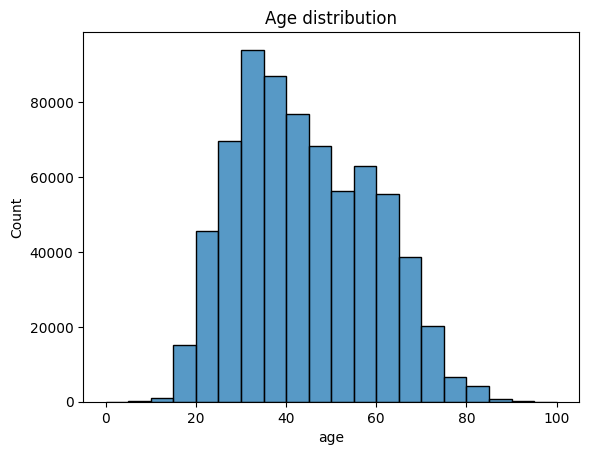

In [105]:
sns.histplot(x=df['age'], bins=20).set_title('Age distribution')
plt.show()

Seems like without outliers and pretty normal distribution

In [106]:
df['age'].min(), df['age'].max()

(0.0, 100.0)

Some outliers however there are

In [107]:
df[df['age'] > 90]

,age,cheque_count_12m_g20,cheque_count_12m_g21,cheque_count_12m_g25,cheque_count_12m_g32,cheque_count_12m_g33,cheque_count_12m_g38,cheque_count_12m_g39,cheque_count_12m_g41,cheque_count_12m_g42,...,sale_sum_12m_g54,sale_sum_6m_g24,sale_sum_6m_g25,sale_sum_6m_g26,sale_sum_6m_g32,sale_sum_6m_g33,sale_sum_6m_g44,sale_sum_6m_g54,target,treatment
14498,99.0,4.0,9.0,0.0,13.0,6.0,8.0,5.0,19.0,10.0,...,4085.04,424.82,0.00,26.49,1392.40,559.76,653.69,3358.99,0,1
22596,100.0,0.0,3.0,1.0,8.0,15.0,7.0,1.0,9.0,9.0,...,369.98,1344.51,33.78,692.55,231.69,2910.78,707.99,339.99,0,1
22885,91.0,5.0,4.0,6.0,5.0,7.0,7.0,9.0,13.0,6.0,...,765.06,437.12,237.68,392.69,813.78,3096.74,1201.88,373.84,0,1
24110,92.0,0.0,0.0,10.0,5.0,19.0,14.0,3.0,3.0,4.0,...,4409.27,2872.22,25.51,1176.71,1690.69,3449.20,0.00,1328.97,0,1
40713,92.0,2.0,0.0,2.0,1.0,0.0,0.0,2.0,0.0,0.0,...,31.89,366.96,0.00,28.99,159.98,0.00,0.00,31.89,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
676399,92.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,...,0.00,267.64,0.00,0.00,0.00,239.21,101.98,0.00,0,1
678782,91.0,0.0,1.0,2.0,0.0,0.0,0.0,1.0,9.0,1.0,...,190.60,0.00,0.00,0.00,0.00,0.00,70.76,0.00,0,1
697789,96.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,...,64.99,59.99,0.00,66.38,763.43,0.00,79.76,64.99,0,1
700042,92.0,7.0,5.0,20.0,5.0,11.0,15.0,4.0,13.0,5.0,...,1672.26,226.33,306.96,1597.76,397.44,1423.24,894.98,1007.58,0,1


In [108]:
df[df['age'] < 10]

,age,cheque_count_12m_g20,cheque_count_12m_g21,cheque_count_12m_g25,cheque_count_12m_g32,cheque_count_12m_g33,cheque_count_12m_g38,cheque_count_12m_g39,cheque_count_12m_g41,cheque_count_12m_g42,...,sale_sum_12m_g54,sale_sum_6m_g24,sale_sum_6m_g25,sale_sum_6m_g26,sale_sum_6m_g32,sale_sum_6m_g33,sale_sum_6m_g44,sale_sum_6m_g54,target,treatment
240,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,...,0.00,264.32,0.00,2404.75,0.00,0.00,331.54,0.00,0,1
9962,7.0,8.0,14.0,13.0,3.0,8.0,4.0,0.0,6.0,7.0,...,1215.79,2124.49,554.87,614.05,879.30,1076.72,764.20,710.01,1,1
24094,7.0,1.0,18.0,4.0,3.0,17.0,4.0,10.0,17.0,7.0,...,2667.89,4034.43,139.02,1022.54,205.10,1260.75,2041.03,1879.13,0,1
34860,6.0,0.0,1.0,0.0,2.0,1.0,0.0,0.0,2.0,0.0,...,0.00,0.00,0.00,0.00,169.00,0.00,0.00,0.00,0,1
40196,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,109.05,48.50,32.98,38.89,0.00,0.00,0.00,109.05,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
684457,7.0,5.0,1.0,4.0,1.0,11.0,1.0,13.0,2.0,4.0,...,974.56,0.00,83.90,0.00,213.29,962.37,229.08,621.22,0,1
690413,9.0,2.0,0.0,1.0,2.0,6.0,3.0,0.0,1.0,4.0,...,669.92,224.51,0.00,0.00,1199.52,547.11,431.52,26.99,0,1
690942,5.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.00,98.92,0.00,0.00,0.00,0.00,0.00,0.00,0,1
691150,8.0,0.0,2.0,51.0,3.0,4.0,2.0,19.0,23.0,0.0,...,2010.22,1748.49,732.93,1312.22,0.00,155.80,583.68,478.32,0,0


Let's ignore it for now

In [109]:
df['age'].describe()

count    702377.000000
mean         43.749755
std          14.848935
min           0.000000
25%          32.000000
50%          42.000000
75%          56.000000
max         100.000000
Name: age, dtype: float64

#### Children

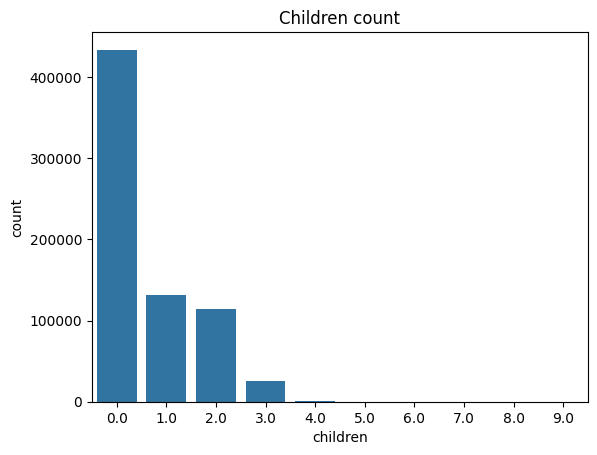

In [110]:
sns.countplot(x=df['children']).set_title('Children count')
plt.show()

In [111]:
df['children'].describe()

count    705650.000000
mean          0.622756
std           0.888415
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           9.000000
Name: children, dtype: float64

But maximum 9 children is not so good, it's better to make all people with more than 3 children as 3

In [112]:
df.loc[df[df['children'] > 3].index, "children"] = 3

In [113]:
df['children'].min(), df['children'].max()

(0.0, 3.0)

## Data Split

In [114]:
from sklearn.model_selection import train_test_split

stratify_cols = pd.concat([df.treatment, df.target], axis=1)

df_train, df_val, treat_train, treat_val, y_train, y_val = train_test_split(
    df.drop(['treatment', 'target'], axis=1),
    df.treatment,
    df.target,
    test_size=0.2,
    random_state=59,
    stratify=stratify_cols
)

print(f"Train shape: {df_train.shape}")
print(f"Validation shape: {df_val.shape}")

Train shape: (571608, 79)
Validation shape: (142902, 79)


## Filling in missing values

As we have only numeric features, we can fill all of them as the median value (to avoid outliers)

In [115]:
df_train.fillna(df_train.median(), inplace=True)
df_val.fillna(df_train.median(), inplace=True)

df_train.isna().sum().sum(), df_val.isna().sum().sum()

(0, 0)

## Feature generation

We can already generate a good feature, that is maturity, person is mature if he/she is older than 18 and not otherwise

In [116]:
df_train['maturity'] = df_train['age'].apply(lambda x: x >= 18)
df_val['maturity'] = df_val['age'].apply(lambda x: x >= 18)

df_train['maturity'].value_counts(normalize=True), df_val['maturity'].value_counts(normalize=True)

(maturity
 True     0.992278
 False    0.007722
 Name: proportion, dtype: float64,
 maturity
 True     0.992218
 False    0.007782
 Name: proportion, dtype: float64)

## Baseline (catboost with default params)

Lets write code for the `Two Model` approach or `T-learner`

In [117]:
from sklearn.base import clone, BaseEstimator


class TwoModelApproach(BaseEstimator):

    def __init__(self, estimator):
        self.estimator = estimator

    def fit(self, X, treatment, y, fit_params={}):
        # assume treatment is binary
        X_treatment = X.loc[treatment == 1].copy()
        y_treatment = pd.Series(y).loc[treatment == 1]
        X_control = X.loc[treatment == 0].copy()
        y_control = pd.Series(y).loc[treatment == 0]

        model_control = clone(self.estimator)
        model_control.fit(X_control, y_control, **fit_params)

        X_treatment.loc[:, 'control_feature'] = model_control.predict_proba(X_treatment)[:, 1]

        model_treatment = clone(self.estimator)
        model_treatment.fit(X_treatment, y_treatment, **fit_params)

        self.model_control = model_control
        self.model_treatment = model_treatment

    def predict_proba(self, X_test):
        pred_control_test = self.model_control.predict_proba(X_test)[:, 1]
        X_test.loc[:, 'control_feature'] = pred_control_test
        pred_treatment_test = self.model_treatment.predict_proba(X_test)[:, 1]
        pred_uplift = pred_treatment_test - pred_control_test
        return pred_uplift

In [118]:
from lightgbm import LGBMClassifier

lgbm_estimator = LGBMClassifier(random_state=42)

two_model = TwoModelApproach(estimator=lgbm_estimator)
two_model.fit(df_train, treat_train, y_train)

[LightGBM] [Info] Number of positive: 14549, number of negative: 127586
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020241 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11052
[LightGBM] [Info] Number of data points in the train set: 142135, number of used features: 80
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.102360 -> initscore=-2.171268
[LightGBM] [Info] Start training from score -2.171268
[LightGBM] [Info] Number of positive: 47253, number of negative: 382220
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.059896 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11477
[LightGBM] [Info] Number of data points in the train set: 429473, number of used features: 81
[LightGBM] [

In [119]:
uplift_pred = two_model.predict_proba(df_val)
uplift_pred

array([-0.01284554,  0.00122322,  0.01469514, ...,  0.01088517,
        0.00336508, -0.02124818])

In [120]:
from sklift.metrics import uplift_at_k

# Assuming y_true, uplift_pred, and treatment are your data
score = uplift_at_k(y_true=y_val, uplift=uplift_pred, treatment=treat_val, k=0.05, strategy='overall')
score

0.10986413783731228

## Predict for test and make submission

### Prediction

In [121]:
df_test = pd.read_csv("data/test_lenta.csv")
df_test.shape

(170297, 193)

In [123]:
df_test.drop(cols_to_drop, axis=1, inplace=True)
df_test.shape

(170297, 79)

In [124]:
df_test.isna().sum()

age                     2977
cheque_count_12m_g20       0
cheque_count_12m_g21       0
cheque_count_12m_g25       0
cheque_count_12m_g32       0
                        ... 
sale_sum_6m_g26          760
sale_sum_6m_g32          760
sale_sum_6m_g33          760
sale_sum_6m_g44          760
sale_sum_6m_g54          760
Length: 79, dtype: int64

In [125]:
df_test.fillna(df.median(), inplace=True)
df_test.isna().sum().sum()

0

In [126]:
df_test['maturity'] = df_test['age'].apply(lambda x: x >= 18)
df_test['maturity'].value_counts(normalize=True)

maturity
True     0.992037
False    0.007963
Name: proportion, dtype: float64

In [127]:
test_uplift_pred = two_model.predict_proba(df_test)
test_uplift_pred

array([0.00410053, 0.00680044, 0.00033834, ..., 0.00137487, 0.00296995,
       0.00663503])

### Submission

In [128]:
sample_sub_df = pd.read_csv("data/sample_submission.csv")
sample_sub_df.head()

,id,predicted_uplift
0,0,0.981304
1,1,0.444829
2,2,0.444000
3,3,-0.442873
4,4,-0.636638


In [129]:
sample_sub_df['predicted_uplift'] = test_uplift_pred
sample_sub_df.head()

,id,predicted_uplift
0,0,0.004101
1,1,0.006800
2,2,0.000338
3,3,0.002655
4,4,0.009093


In [130]:
sample_sub_df.to_csv("submissions/Baseline_Lightgbm.csv", index=False)